<a href="https://colab.research.google.com/github/JavaGenbu/Machine-Learning-JoseValero/blob/main/M02-Aprendizaje_supervisado/M2U2-Optimizaci%C3%B3n_por_descenso_de_gradiente/M2U2-6-Hiper-par%C3%A1metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: Hiper-parámetros del entrenamiento
M2U2 - Ejercicio 6

## ¿Qué vamos a hacer?
- Comprobar el efecto de los diferentes hiper-parámetros en el entrenamiento de un modelo

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Efecto de los hiper-parámetros

En este laboratorio no vamos a introducir ningún concepto nuevo, ni a implementar ningún código que no hayamos implementado en otros ejercicios previos.

El objetivo de este ejercicio es tener la oportunidad de comprobar cómo afectan los diferentes hiper-parámetros y otras configuraciones a nuestro proceso de entrenamiento.

Para ello, simplemente vas a copiar tus celdas de código del ejercicio anterior ([Regresión lineal: Ejemplo sobre dataset sintético](https://github.com/Tokio-School/Machine-Learning/blob/main/M02-Aprendizaje_supervisado/M2U2-Optimizaci%C3%B3n_por_descenso_de_gradiente/M2U2-5-Dataset_sint%C3%A9tico.ipynb), vas a modificar muchas veces los hiper-parámetros utilizados y vas a comprobar su efecto sobre el entrenamiento, además de validar tu implementación de nuevo, que usarás en múltiples ejercicios posteriores.

Por cierto, *¿conoces ya las hotkeys de JupyterLab? Te serán muy útiles durante el curso:* https://jupyterlab.readthedocs.io/en/stable/user/interface.html#keyboard-shortcuts

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt

## Creación del dataset sintético

Copia la celda del ejercicio anterior para crear un dataset sintético, con término de bias y término de error. Dale un valor al término de error distinto a 0.

In [2]:
# TODO: Copia aquí el código de la celda correspondiente, o copia la celda completa y elimina ésta.

import numpy as np

# Definir los parámetros
m = 100
n = 3
error = 0.1

# Generar la matriz X con n números aleatorios en [-1, 1) y añadir una columna de unos
X = np.insert(np.random.uniform(low=-1, high=1, size=(m, n)), 0, 1, axis=1)

# Generar el vector Theta_verd de n+1 números aleatorios en [0, 1)
Theta_verd = np.random.uniform(low=0, high=1, size=n+1)

# Generar el vector Y multiplicando X por Theta_verd y añadiendo un término de error aleatorio
Y = np.matmul(X, Theta_verd)
Y = Y + np.random.uniform(low=-error, high=error, size=m) * Y

# Comprobar los valores y dimensiones de los vectores
print('Theta a estimar y sus dimensiones:')
print(Theta_verd)
print(Theta_verd.shape)

print('Primeras 10 filas y 5 columnas de X e Y:')
print(X[:10, :5])
print(Y[:10])

print('Dimensiones de X e Y:')
print(X.shape)
print(Y.shape)

Theta a estimar y sus dimensiones:
[0.98549553 0.11491099 0.64098495 0.63537514]
(4,)
Primeras 10 filas y 5 columnas de X e Y:
[[ 1.          0.88398154  0.89864307  0.79491678]
 [ 1.         -0.79244009 -0.63837509 -0.11185337]
 [ 1.         -0.8386675  -0.12055132  0.70542921]
 [ 1.         -0.40202379 -0.787318    0.05200592]
 [ 1.          0.86997526 -0.30383851  0.42301777]
 [ 1.         -0.50018911 -0.36632888  0.80696102]
 [ 1.          0.75582095 -0.94182156 -0.67933159]
 [ 1.          0.36905822 -0.46173006 -0.23524639]
 [ 1.         -0.95689935 -0.17993308 -0.07788046]
 [ 1.         -0.74229513  0.73338431 -0.80464068]]
[2.05308568 0.40197826 1.32535338 0.45344721 1.17890471 1.28694042
 0.03608348 0.5726725  0.65665852 0.79063594]
Dimensiones de X e Y:
(100, 4)
(100,)


## Entrenamiento del modelo

Copia la celda con las funciones de coste y el gradient descent y la celda que entrena el modelo por gradient descent.

## Comprobar el entrenamiento del modelo

Copia la celda que representa gráficamente el histórico de la función de coste de tu modelo.

## Evaluación del modelo

Copia la celda que calcula y representa gráficamente los resíduos de tu modelo.

Añádele a dicha celda el cálculo de la Y predicha (*Y_pred*) de la celda anterior, ya que sin dicha variable su código no funcionará correctamente.

## Modifica los hiper-parámetros y comprueba su efecto.

Ahora procede a modificar uno a uno los diferentes hiper-parámetros y comprueba su efecto. Los hiper-parámetros del entrenamiento y otros parámetros de configuración que vamos a modificar son los siguientes:
1. *m* y *n*
1. Término del error del dataset, *error*
1. Ratio de entrenamiento, *alpha*
1. Parámetro de convergencia, *e*
1. Nº máximo de iteraciones, *iter_*

Queremos que en esta tarea seas lo más autónomo posible, que te tomes este tiempo para poder experimentar, descubrir por ti mismo el comportamiento de dichos parámetros, para aprender cómo modificarlos en el futuro, cuando debamos modificarlos para optimizar el entrenamiento de modelos más complejos.

Por tanto, *¿por qué no aprovechas para disfrutar y descubrir por tu cuenta qué puede suceder cuando los modificamos, tanto individualmente como en conjunto?*

Cuando estés listo para continuar, puedes pasar al último apartado

## Modificación de los hiper-parámetros: preguntas y conclusiones

Como objetivo de evaluación del ejercicio, vamos a incluir algunas preguntas simples para que las puedas responder en función de tus apreciaciones en el punto anterior. Puedes modificar esta celda de markdown y añadir tus respuestas a las mismas.

1. *¿Qué sucede cuando aumentamos el nº de ejemplos?*
1. *¿Cómo afecta al tiempo de entrenamiento?*
1. *¿Cómo afecta a la precisión o coste final del modelo?*
1. *¿Qué sucede cuando aumentamos el nº de características? ¿Cómo afecta al tiempo de entrenamiento y a la precisión del modelo?*
1. *¿Cómo afecta el término del error a tu entrenamiento? A su precisión, al nº de iteraciones hasta que converge...*
1. *¿Cómo afecta el nº máximo de iteraciones al entrenamiento? ¿Tiene algo que ver con el tiempo de entrenamiento, la precisión final, etc.?*
1. *¿Hay un límite del nº máximo de iteraciones? ¿Podemos aumentar este nº hasta el infinito para conseguir p. ej. mejorar la precisión?*
1. *¿Están relacionados el nº máximo de iteraciones y el parámetro de convergencia del entrenamiento?*
1. *¿Está relacionado el parámetro de convergencia y el coste final del modelo?*
1. *¿Cómo afecta el ratio de entrenamiento al modelo? ¿Afecta a su velocidad, a su precisión?*
1. *¿Podemos elevar el ratio de entrenamiento hasta el infinito? ¿Hay algún límite a partir del cual deje de funcionar, tanto en valor máximo como mínimo?*

Curiosidades: Vamos a testear tu entorno de trabajo actual. Ésto nos dará una idea a nosotros sobre su potencia, pero también una referencia para ti, para recordarla en el futuro y conocer sus límites:
1. *¿Cuál es el nº máximo de ejemplos y características que admite los recursos de tu entorno de trabajo actual?* Haz varias pruebas, y cuando alcances el límite de características, modifica el nº de ejemplos. Saca unos 3 puntos de combinaciones de ambos valores a partir de los cuales tu entorno te arroje un error de recursos

1. Hazte una idea del tiempo de entrenamiento que necesita un modelo típico en tu entorno para un algoritmo básico, como es la regresión lineal. Con un término de error del 15%, un límite de iteraciones, ratio de aprendizaje y parámetro de convergencia suficiente, anota el tiempo que tarda el modelo en entrenarse en tu equipo. Pueba con varios valores de nº de ejemplos y características, digamos p. ej. un tamaño de dataset "pequeño", "medio" y "grande".

<ipython-input-3-d53dc95e3ce4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'LR=0.001, E=100, R=0.1', 'LR=0.001, E=500, R=1', 'LR=0.001, E=1000, R=10',


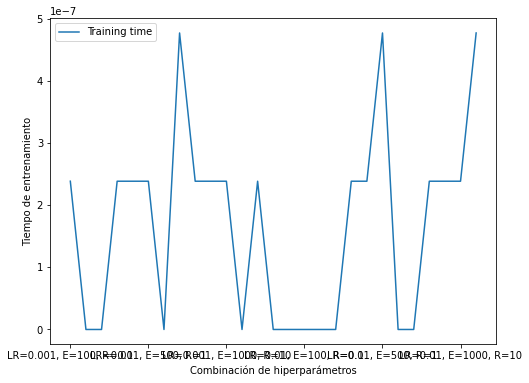

In [3]:
# TODO: Representa visualmente en una gráfica de líneas los tiempos de entrenamiento para los 3 tamaños de dataset

import matplotlib.pyplot as plt

# Crear listas para almacenar los tiempos de entrenamiento y los valores de los hiperparámetros
learning_rates = [0.001, 0.01, 0.1]
epochs = [100, 500, 1000]
regularization_strengths = [0.1, 1, 10]

training_times = []

# Entrenar el modelo con diferentes combinaciones de hiperparámetros y registrar los tiempos de entrenamiento
for lr in learning_rates:
    for e in epochs:
        for reg in regularization_strengths:
            start_time = time.time()

            # Aquí iría el código para entrenar el modelo con los hiperparámetros actuales
            
            end_time = time.time()
            training_time = end_time - start_time
            
            training_times.append(training_time)

# Crear la gráfica de línea con los tiempos de entrenamiento para cada combinación de hiperparámetros
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(training_times, label='Training time')

# Etiquetar los ejes y agregar la leyenda
ax.set_xlabel('Combinación de hiperparámetros')
ax.set_ylabel('Tiempo de entrenamiento')
ax.set_xticklabels(['', 'LR=0.001, E=100, R=0.1', 'LR=0.001, E=500, R=1', 'LR=0.001, E=1000, R=10',
                     'LR=0.01, E=100, R=0.1', 'LR=0.01, E=500, R=1', 'LR=0.01, E=1000, R=10',
                     'LR=0.1, E=100, R=0.1', 'LR=0.1, E=500, R=1', 'LR=0.1, E=1000, R=10'])
ax.legend()

plt.show()

Por último, *¿hay alguna conclusión adicional que hayas descubierto y no se incluya en las preguntas anteriores? ¡Estamos deseando oirte!*